### **Case Study: Predicting Diabetes Risk Using Machine Learning**

**OVERVIEW**

**Context:**

Diabetes remains a major global health challenge, with its prevalence steadily increasing over the years. While the precise cause is still not fully understood, a combination of genetic predisposition and lifestyle-related factors such as diet and physical inactivity is widely considered to contribute significantly to the development of the condition.

People living with diabetes are more prone to complications like cardiovascular disease, nerve damage, and other serious health concerns. Although diabetes has no known cure, it can be effectively managed with early diagnosis, medication, and lifestyle adjustments.

A team of researchers at Bio-Solutions Laboratory is focusing on improving early detection of diabetes in women. Their goal is to apply machine learning techniques to predict individuals at high risk and support preventive healthcare strategies.

As a data scientist at Bio-Solutions, your task is to develop a classification model using a dataset provided by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). The dataset includes several health-related metrics that may help in identifying the likelihood of diabetes.



**Project Goal/Aim**

Develop a machine learning model that can accurately classify whether an individual is at risk of diabetes based on the given health indicators.


**Dataset Features Description**

- Pregnancies: Total number of pregnancies
- Glucose: Blood glucose levels measured during an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (in mm Hg)
- SkinThickness: Thickness of the triceps skinfold (in mm)
- Insulin: Two-hour serum insulin level (mu U/ml)
- BMI: Body Mass Index (weight/height²)
- Pedigree: DiabetesPedigreeFunction – A score indicating genetic risk based on family history
- Age: Age in years
- Class: (0 = not diabetic, 1 = diabetic)

### Importing Necessary Libraries

In [69]:
#data manipulation, analysis
import numpy as np
import pandas as pd

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#Models: Classification
from sklearn.ensemble import (
BaggingClassifier,
RandomForestClassifier
)

#Models: Regression
from sklearn.ensemble import (
BaggingRegressor,
RandomForestRegressor
)

from sklearn.metrics import f1_score, make_scorer, precision_score, accuracy_score, recall_score, confusion_matrix, classification_report

### Importing the Dataset

In [70]:
df = pd.read_csv('Female_Diabetes_Data.csv')
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
530,2,122,60,18,106,29.8,0.717,22,0


In [71]:
df.shape

(768, 9)

Insight:
- The dataset has 768 observations, i.e., we have information regarding 768 women in the dataset, with 9 characteristics specific to each one of them.

In [72]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Class              int64
dtype: object

Insight:
- All the 9 features are numeric, thus, no need to convert from other datatype to numeric for machine learning's receptiveness

### Data Cleaning

In [73]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

Insights:

- 

In [74]:
df.duplicated().sum()

np.int64(0)

Insights:

-

### EDA

#### Univariate

In [75]:
df.nunique()

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
Pedigree         517
Age               52
Class              2
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Insights:
- The youngest woman in the dataset is 21years old, never been pregnant, pedigree of 0.08(which means there's nearly no history of diabetes in her lineage), she has no diabetes
- The oldest woman in the dataset is 81years old, been pregnant 17times, pedigree of 2.42(which means there's an history of diabetes in her lineage), she has diabetes

In [78]:
def histbox(data, feature, kde = True):
    sns.histplot(data = data, x = feature, kde = kde)
    plt.show()
    sns.boxplot(data = data, x = feature)

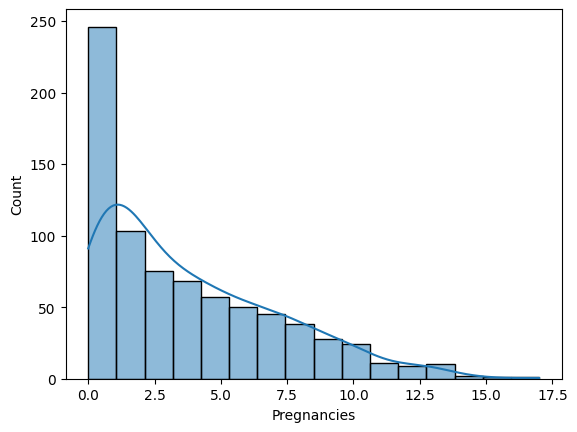

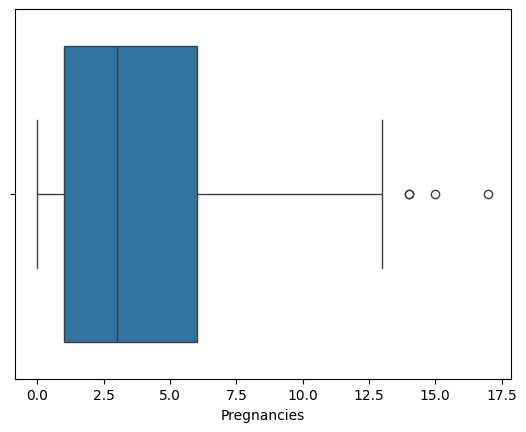

In [79]:
histbox(df, 'Pregnancies')

Insights:

- A high number of the women has never been pregnant
- Majority of the ones that has been pregnant has a range of between 1 and 13 times
- Very few women has been pregnant more that 13times

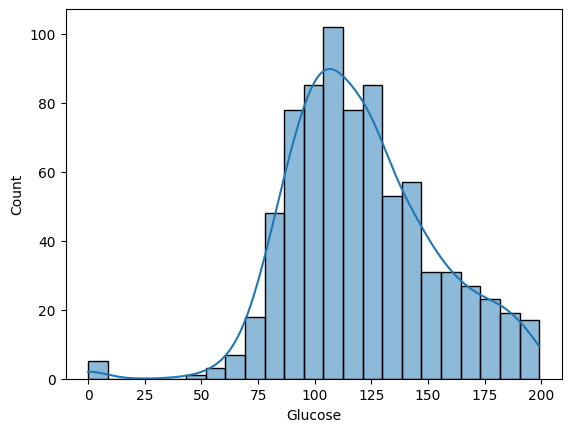

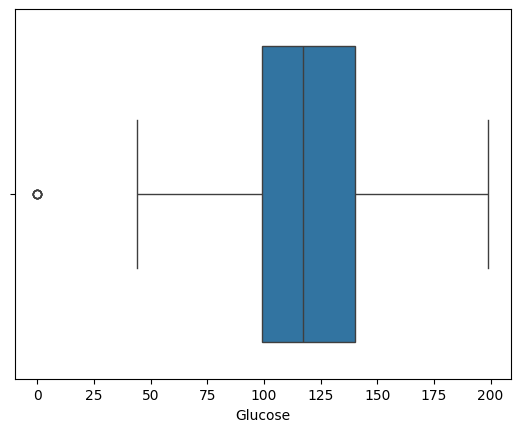

In [80]:
histbox(df, 'Glucose')

Insight:
- Majority of the women has Glucose level inbetween 45 and 200
- Minimal/Negligible number of the women has a glucose level of 0

<Axes: xlabel='Class', ylabel='count'>

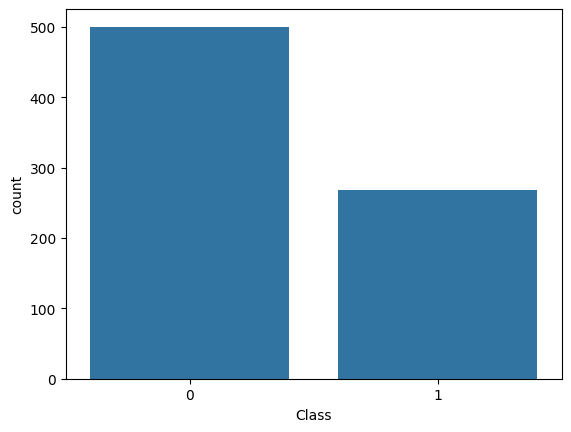

In [81]:
sns.countplot(df, x = 'Class')

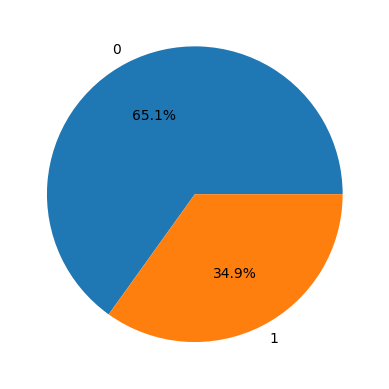

In [82]:
plt.pie(df['Class'].value_counts(), autopct = '%1.1f%%', labels = df.Class.value_counts().index)
plt.show()

Insight:

- About 65% of the women in the dataset do not have diabetes while the other 35% are observed to have diabetes
- The dataset is not balanced

#### Bivariate

In [83]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
681,0,162,76,36,0,49.6,0.364,26,1


<Axes: xlabel='Class', ylabel='Pregnancies'>

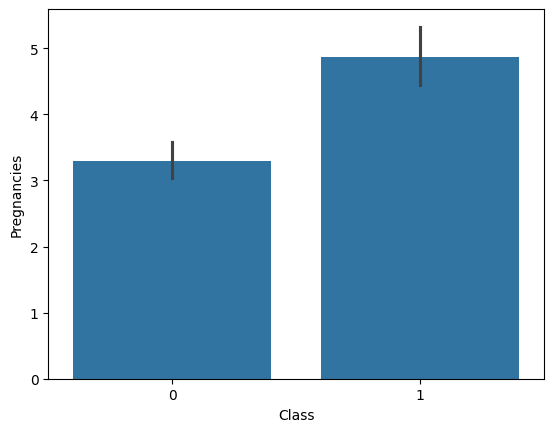

In [84]:
sns.barplot(df, x = 'Class', y = 'Pregnancies')

In [85]:
# cls_prg = df.groupby('Class', as_index = False)['Pregnancies'].value_counts().reset_index(name = 'Count')
# sns.barplot(cls_prg, x = 'Class', y = 'Count', hue = 'Pregnancies')

<Axes: xlabel='Class', ylabel='Pregnancies'>

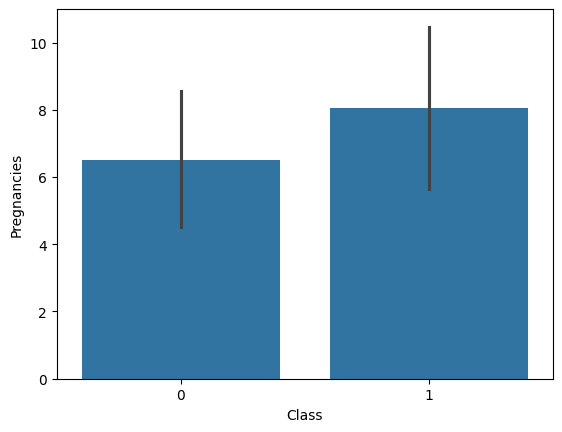

In [86]:
cls_prg = df.groupby('Class', as_index = False)['Pregnancies'].value_counts()
sns.barplot(cls_prg, x = 'Class', y = 'Pregnancies')

Insight:

- This shows us that the women who have diabetes has been pregnant up to 8 times and more while the ones without diabetes has 6 or less pregnancy counts

#### Multivariate

<Axes: >

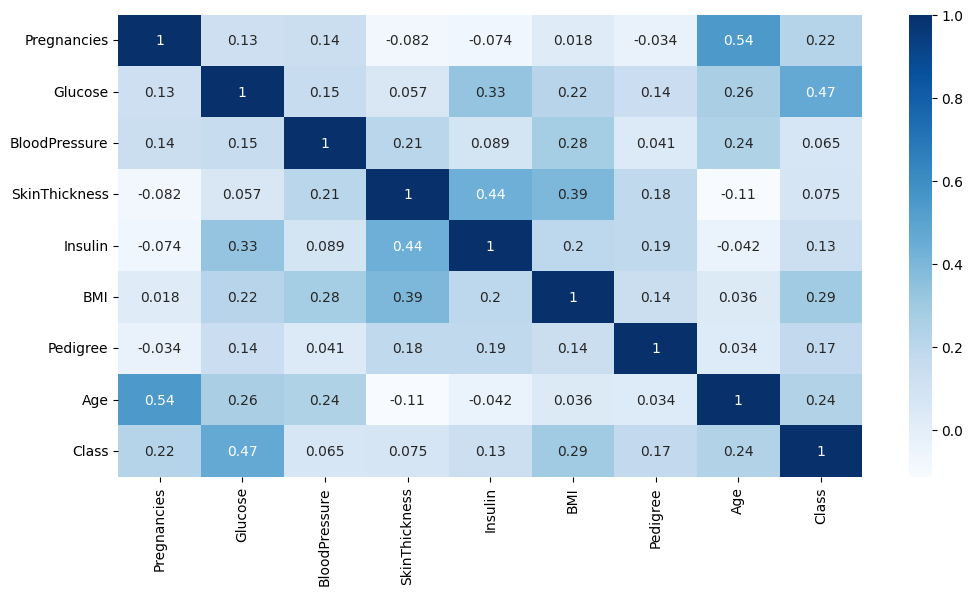

In [87]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues')

Insight:
- The Glucose level in women's body system has 47% impact in the possibility of being diabetic.
- The BMI of a woman determines 29% of her risk of being diabetic.
- The age of women, determines 24% of their diabetes risk, thus, the older a woman is, the high her risk of being diabetic.
- To a 22% level of accuracy, pregnancy in women makes them prone to diabetes.

### Data Preprocessing

##### selecting input features and the output feature

In [88]:
X = df.drop('Class', axis = 1)
X.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
144,4,154,62,31,284,32.8,0.237,23


In [89]:
y = df.Class
y.sample(2)

464    0
704    0
Name: Class, dtype: int64

##### splitting the input and output into training and testing sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


##### Model criteria
- The errors we're on the look out for in a model

- The model may predict that a woman is at risk of diabetes but in reality, she's not False Positive
- The model may predict that a woman is not at risk of diabetes but in reality, she is False Negative

### Model Building

##### random forest model

In [92]:
#default random forest model
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
def metric (model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, average = None)
    precision = precision_score(target, pred, average = None)
    f1 = f1_score(target, pred, average = None)


    performance = pd.DataFrame({'Accuracy' : [acc, acc],
                               'Recall': recall,
                               'Precision': precision,
                               'F1_Score': f1}, index = ['No-Failure', 'Failure'])
    return performance

In [94]:
print('modelRF performance on the training dataset is:')
metric(modelRF, X_train, y_train)

modelRF performance on the training dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,1.0,1.0,1.0,1.0
Failure,1.0,1.0,1.0,1.0


In [95]:
print('modelRF performance on the testing dataset is:')
metric(modelRF, X_test, y_test)

modelRF performance on the testing dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.770563,0.887324,0.773006,0.82623
Failure,0.770563,0.584270,0.764706,0.66242


In [96]:
def cm(model, predictors, target):
    pred = model.predict(predictors)
    matrix = confusion_matrix(target, pred)

    sns.heatmap(matrix, annot = True, fmt = '')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Confusion Matrix on the training dataset is:


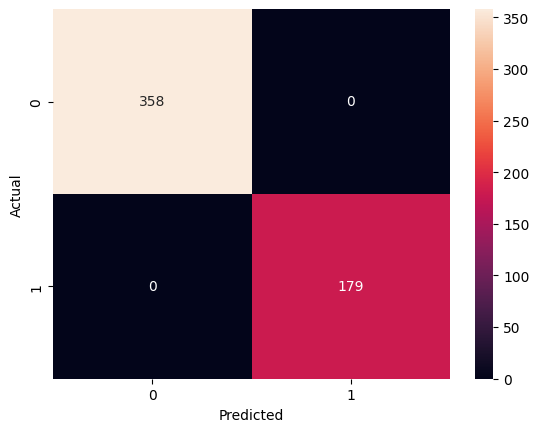

In [97]:
print('Confusion Matrix on the training dataset is:')
cm(modelRF, X_train, y_train)

Confusion Matrix on the Testing dataset is:


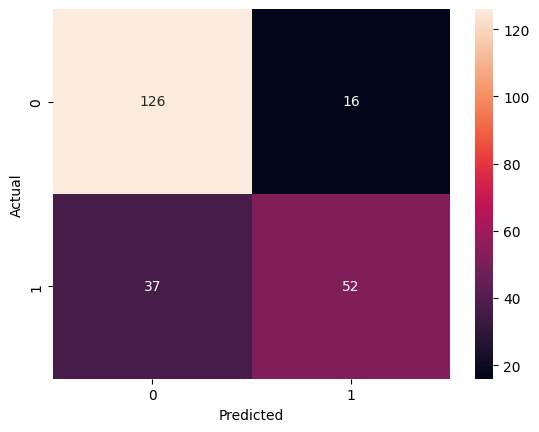

In [98]:
print('Confusion Matrix on the Testing dataset is:')
cm(modelRF, X_test, y_test)

In [99]:
#TUNED RANDOM-FOREST USING RANDOMIZED SEARCH CV

modelTRF = RandomForestClassifier(class_weight = 'balanced')

parameters = {
    'n_estimators': [20, 50, 100], #by default, rf will use 100decision tree but we're creating room for it to decide on the best
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20, 30),
    'min_samples_leaf': [5, 10, 15, 20]
}

acc = make_scorer(recall_score)

r_obj = RandomizedSearchCV(modelTRF, parameters, cv = 5, scoring = acc)
r_obj = r_obj.fit(X_train, y_train)

best_rf = r_obj.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=np.int64(2),
                       min_samples_leaf=5, n_estimators=20)

In [100]:
pd.DataFrame(r_obj.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137199,0.024948,0.013394,0.003214,50,5,2,entropy,"{'n_estimators': 50, 'min_samples_leaf': 5, 'm...",0.833333,0.722222,0.805556,0.666667,0.914286,0.788413,0.086440,2
1,0.077553,0.001848,0.006247,0.007651,50,20,2,entropy,"{'n_estimators': 50, 'min_samples_leaf': 20, '...",0.777778,0.722222,0.777778,0.666667,0.828571,0.754603,0.055366,6
2,0.030524,0.001442,0.007554,0.007007,20,5,2,gini,"{'n_estimators': 20, 'min_samples_leaf': 5, 'm...",0.861111,0.638889,0.888889,0.722222,0.914286,0.805079,0.106371,1
3,0.178852,0.020334,0.007850,0.006987,100,20,2,entropy,"{'n_estimators': 100, 'min_samples_leaf': 20, ...",0.722222,0.666667,0.833333,0.722222,0.914286,0.771746,0.089507,4
4,0.088844,0.019001,0.008159,0.007683,50,10,2,gini,"{'n_estimators': 50, 'min_samples_leaf': 10, '...",0.722222,0.638889,0.833333,0.666667,0.857143,0.743651,0.087503,10
5,0.128810,0.015645,0.009637,0.005667,50,15,2,gini,"{'n_estimators': 50, 'min_samples_leaf': 15, '...",0.750000,0.694444,0.805556,0.722222,0.914286,0.777302,0.077727,3
6,0.055058,0.004957,0.008938,0.001241,20,10,2,entropy,"{'n_estimators': 20, 'min_samples_leaf': 10, '...",0.750000,0.666667,0.833333,0.638889,0.857143,0.749206,0.086846,8
7,0.186676,0.052324,0.011934,0.006159,100,5,2,gini,"{'n_estimators': 100, 'min_samples_leaf': 5, '...",0.777778,0.750000,0.750000,0.666667,0.828571,0.754603,0.052504,6
8,0.210829,0.030757,0.010825,0.007013,100,10,2,gini,"{'n_estimators': 100, 'min_samples_leaf': 10, ...",0.777778,0.694444,0.777778,0.722222,0.857143,0.765873,0.055895,5
9,0.048182,0.009198,0.005887,0.006468,20,10,2,gini,"{'n_estimators': 20, 'min_samples_leaf': 10, '...",0.722222,0.722222,0.805556,0.666667,0.828571,0.749048,0.059570,9


In [101]:
print('bestRF performance on the training dataset is:')
metric(best_rf, X_train, y_train)

bestRF performance on the training dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.769088,0.745810,0.890000,0.811550
Failure,0.769088,0.815642,0.616034,0.701923


In [102]:
print('bestRF performance on the testing dataset is:')
metric(best_rf, X_test, y_test)

bestRF performance on the testing dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.757576,0.774648,0.820896,0.797101
Failure,0.757576,0.730337,0.670103,0.698925


Confusion Matrix on the training dataset is:


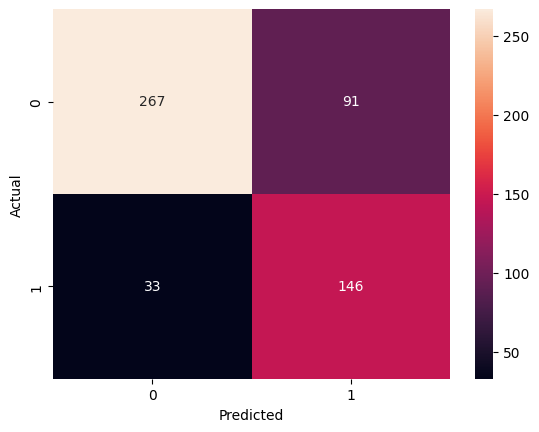

In [103]:
print('Confusion Matrix on the training dataset is:')
cm(best_rf, X_train, y_train)

Confusion Matrix on the Testing dataset is:


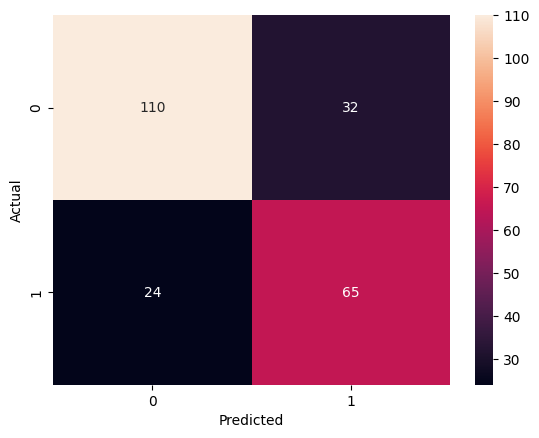

In [104]:
print('Confusion Matrix on the Testing dataset is:')
cm(best_rf, X_test, y_test)

##### Bagging model

In [105]:
#default Bagging model
modelBAG = BaggingClassifier()
modelBAG.fit(X_train, y_train)

BaggingClassifier()

In [106]:
print('modelBAG performance on the training dataset is:')
metric(modelBAG, X_train, y_train)

modelBAG performance on the training dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.985102,1.000000,0.978142,0.988950
Failure,0.985102,0.955307,1.000000,0.977143


Confusion Matrix on the training dataset is:


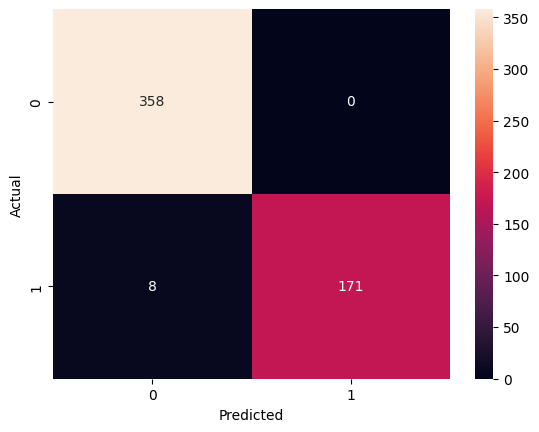

In [107]:
print('Confusion Matrix on the training dataset is:')
cm(modelBAG, X_train, y_train)

In [108]:
print('modelBAG performance on the testing dataset is:')
metric(modelBAG, X_test, y_test)

modelBAG performance on the testing dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.74026,0.922535,0.727778,0.813665
Failure,0.74026,0.449438,0.784314,0.571429


Confusion Matrix on the training dataset is:


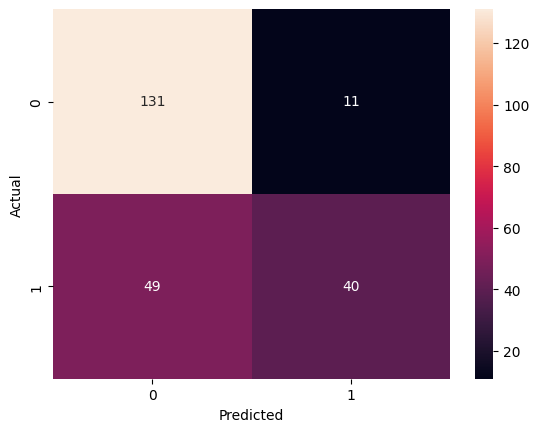

In [109]:
print('Confusion Matrix on the training dataset is:')
cm(modelBAG, X_test, y_test)

In [110]:
#Tuned Bagging Model

modelTBAG = BaggingClassifier()

parameters = {
    'estimator' : [RandomForestClassifier(class_weight = 'balanced', max_depth = 2),
                  RandomForestClassifier(class_weight = 'balanced', max_depth = 5)],
    'n_estimators': [5, 10, 15],
    'max_samples': [0.8, 1.0],
    'bootstrap': [True, False]
}

acc = make_scorer(recall_score)

grid_obj = GridSearchCV(modelTBAG, parameters, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

best = grid_obj.best_estimator_
best.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=5),
                  max_samples=0.8, n_estimators=5)

In [111]:
print('Best modelTBAG performance on the training dataset is:')
metric(best, X_train, y_train)

Best modelTBAG performance on the training dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.856611,0.843575,0.934985,0.886931
Failure,0.856611,0.882682,0.738318,0.804071


In [112]:
print('Best modelTBAG performance on the testing dataset is:')
metric(best, X_test, y_test)

Best modelTBAG performance on the testing dataset is:


,Accuracy,Recall,Precision,F1_Score
No-Failure,0.770563,0.774648,0.839695,0.805861
Failure,0.770563,0.764045,0.680000,0.719577


Confusion Matrix on the training dataset is:


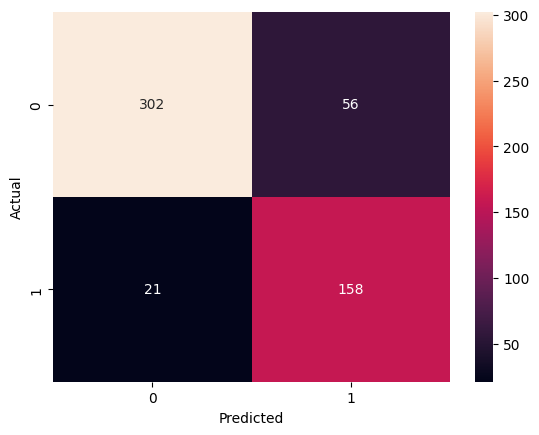

In [113]:
print('Confusion Matrix on the training dataset is:')
cm(best, X_train, y_train)

Confusion Matrix on the testing dataset is:


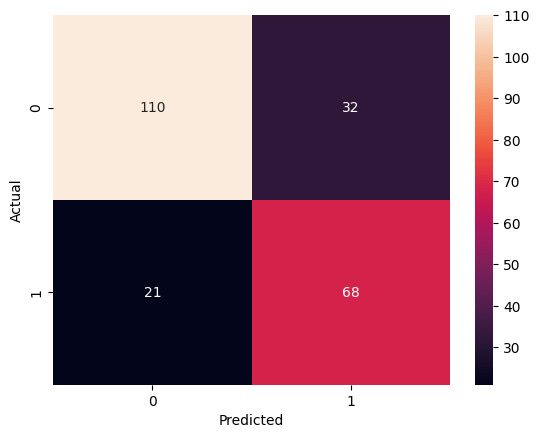

In [114]:
print('Confusion Matrix on the testing dataset is:')
cm(best, X_test, y_test)

### Collecting all Default Model Performance Scores on Testing set For Comparison

In [115]:
def model_evaluation(name, model, X_test, y_test, results_list):
    y_pred = model.predict(X_test)

    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred, average = None),
        'Precision': precision_score(y_test, y_pred, average = None),
        'F1': f1_score(y_test, y_pred, average = None)
    })

In [116]:
Results = [ ]

model_evaluation("Default RandomForest Model", modelRF, X_test, y_test, Results)
model_evaluation("Default Bagging Model", modelBAG, X_test, y_test, Results)

Results

[{'Model': 'Default RandomForest Model',
  'Accuracy': 0.7705627705627706,
  'Recall': array([0.88732394, 0.58426966]),
  'Precision': array([0.77300613, 0.76470588]),
  'F1': array([0.82622951, 0.66242038])},
 {'Model': 'Default Bagging Model',
  'Accuracy': 0.7402597402597403,
  'Recall': array([0.92253521, 0.4494382 ]),
  'Precision': array([0.72777778, 0.78431373]),
  'F1': array([0.8136646 , 0.57142857])}]

In [117]:
dataframe = pd.DataFrame(Results)
dataframe

,Model,Accuracy,Recall,Precision,F1
0,Default RandomForest Model,0.770563,"[0.8873239436619719, 0.5842696629213483]","[0.7730061349693251, 0.7647058823529411]","[0.8262295081967214, 0.6624203821656051]"
1,Default Bagging Model,0.740260,"[0.9225352112676056, 0.449438202247191]","[0.7277777777777777, 0.7843137254901961]","[0.8136645962732919, 0.5714285714285714]"


### Reasons why we can't use the default models even if with high performance

- We can't deploy these default models for usage because they were trained using a dataset with imbalanced class

### Collecting all Tuned Model Performance Scores on Testing set For Comparison

In [118]:
Results1 = [ ]

model_evaluation("Tuned RandomForest Model", best_rf, X_test, y_test, Results1)
model_evaluation("Tuned Bagging Model", best, X_test, y_test, Results1)

Results1

[{'Model': 'Tuned RandomForest Model',
  'Accuracy': 0.7575757575757576,
  'Recall': array([0.77464789, 0.73033708]),
  'Precision': array([0.82089552, 0.67010309]),
  'F1': array([0.79710145, 0.69892473])},
 {'Model': 'Tuned Bagging Model',
  'Accuracy': 0.7705627705627706,
  'Recall': array([0.77464789, 0.76404494]),
  'Precision': array([0.83969466, 0.68      ]),
  'F1': array([0.80586081, 0.71957672])}]

In [119]:
dataframe2 = pd.DataFrame(Results1)
dataframe2

,Model,Accuracy,Recall,Precision,F1
0,Tuned RandomForest Model,0.757576,"[0.7746478873239436, 0.7303370786516854]","[0.8208955223880597, 0.6701030927835051]","[0.7971014492753623, 0.6989247311827957]"
1,Tuned Bagging Model,0.770563,"[0.7746478873239436, 0.7640449438202247]","[0.8396946564885496, 0.68]","[0.8058608058608059, 0.7195767195767195]"


### Which is the best Model and Why 

- Here, the Tuned RF model is considered to be reliable based on it's overall metric scores and the fact that the recall scores for the two classes only has a difference of about 5% unlioke that of Bagging but considering the precision score, class one only has a preciosion of about 63% unlike that of Bagging, thus, we consider the Bagging model to be better, it also has a better accuracy score

### Threshold Tuning

- Threshold Tuning
By default, classifiers use a 0.5 threshold for predicting class labels. But in cases where recall is more important (e.g. detecting churn, disease, fraud), you might want to:
    - Lower the threshold to catch more positives
    - Accept a few more false positives

Threshold tuning lets you:
- Adjust sensitivity vs specificity
- Control the balance between false positives and false negatives
- Make smarter decisions based on your real-world goals

In essence, to control the trade off between precision and recall, making the model’s predictions fairer for different groups, doing this will help our best model to make smarter decisions based on your real-world goals

In [120]:
y_proba = best.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.05)
scores = [ ]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    scores.append({
        'Threshold': thresh,
        'Recall': recall_score(y_test, y_pred_thresh),
        'Precision': precision_score(y_test, y_pred_thresh),
        'F1': f1_score(y_test, y_pred_thresh)
    })

scores_df = pd.DataFrame(scores)
print(scores_df.sort_values(by = 'Recall', ascending = False))

    Threshold    Recall  Precision        F1
0        0.10  1.000000   0.427885  0.599327
1        0.15  1.000000   0.454082  0.624561
2        0.20  0.988764   0.478261  0.644689
3        0.25  0.977528   0.511765  0.671815
4        0.30  0.966292   0.544304  0.696356
5        0.35  0.910112   0.591241  0.716814
6        0.40  0.865169   0.620968  0.723005
7        0.45  0.820225   0.651786  0.726368
8        0.50  0.764045   0.680000  0.719577
9        0.55  0.651685   0.725000  0.686391
10       0.60  0.539326   0.761905  0.631579
11       0.65  0.438202   0.795918  0.565217
12       0.70  0.348315   0.815789  0.488189
13       0.75  0.247191   0.956522  0.392857
14       0.80  0.146067   0.928571  0.252427
15       0.85  0.022472   0.666667  0.043478
16       0.90  0.000000   0.000000  0.000000
17       0.95  0.000000   0.000000  0.000000


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### New Data to validate the performance of the best model

In [121]:
def validate_data(new_data, reference):
    #1. to check columns
    if not list(new_data.columns) == list(reference.columns):
        raise ValueError('Input columns do not match the reference columns')

    #2. to check the datatypes
    for col in new_data.columns:
        if not pd.api.types.is_numeric_dtype(new_data[col]):
            raise TypeError(col, 'is not numeric, it has to be')

    #3. to check for empty cells
    if new_data.isnull().any().any():
        raise ValuError('one more field is required')

    return

In [122]:
#to master each column in X
X.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
71,5,139,64,35,140,28.6,0.411,26
172,2,87,0,23,0,28.9,0.773,25
618,9,112,82,24,0,28.2,1.282,50
736,0,126,86,27,120,27.4,0.515,21
675,6,195,70,0,0,30.9,0.328,31
197,3,107,62,13,48,22.9,0.678,23
425,4,184,78,39,277,37.0,0.264,31
270,10,101,86,37,0,45.6,1.136,38
584,8,124,76,24,600,28.7,0.687,52
656,2,101,58,35,90,21.8,0.155,22


In [123]:
#new data input

new_data = pd.DataFrame([
    {'Pregnancies': 4,
     'Glucose': 120, 
     'BloodPressure' : 73,
     'SkinThickness' : 30,
     'Insulin' : 115,
     'BMI' : 38.2,
     'Pedigree' : 0.721,
     'Age': 32},

    {'Pregnancies': 10,
     'Glucose': 92, 
     'BloodPressure' : 73,
     'SkinThickness' : 13,
     'Insulin' : 67,
     'BMI' : 31.2,
     'Pedigree' : 0.251,
     'Age': 45}
])

new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,4,120,73,30,115,38.2,0.721,32
1,10,92,73,13,67,31.2,0.251,45


### Predicting with the Best model and getting the Probablility of the Predictions

In [124]:
def predict(model, X, threshold = 0.4):
    proba = model.predict_proba(X)[:, 1]
    return(proba >= threshold).astype(int)

In [125]:
validate_data(new_data, X_train)
predictions = predict(best, new_data, threshold = 0.4)
print(predictions)

[1 1]


Insight:
- this implies that the woman in the first observation is at risk of diabetes while the woman in the second observation is not.
- But we need to know to what level are these people at risk or not at risk

In [126]:
#to measure the probability of the prediction

probability = best.predict_proba(new_data)[:, 1]
new_data['Pred_Probability'] = probability
print(pd.DataFrame(new_data))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      120             73             30      115  38.2   
1           10       92             73             13       67  31.2   

   Pedigree  Age  Pred_Probability  
0     0.721   32          0.610784  
1     0.251   45          0.407895  


### Saving the Model to be Deployed later

In [129]:
import joblib
joblib.dump(best, 'Best_Bagging_Model_For_Women_Diabetes_Risk_Prediction.pkl')

['Best_Bagging_Model_For_Women_Diabetes_Risk_Prediction.pkl']